# Numerical Control

$$r(t) = \dot{a}(t) = \ddot{v}(t) = \overset{\dots}s(t)$$



## Task 1

The tool has a velocity control with jerk limitation. The threshold values are:

$r_{max}=400m/s^3$ &nbsp;&nbsp; $a_{max}=10m/s^2$

The x-axis is to be moved from $x_{start}=15mm$ to $x_{end}=125mm$ at a path velocity of $v_{path}=0.3m/s$

1.1 Qualitatively derive the profiles for jerk, acceleration, velocity, and distance, and characterise the different motion phases.

1.2 Calculate the times at the phase transitions and the corresponding values for acceleration, velocity, and distance.

---

### Solution 1.1


$r = r_{max}$

$a(t) = \int_{t_0}^{t} r(t) dt  + a(t_0) = r_{max} \cdot (t-t_0)+ a(t_0)$

$v(t) = \int_{t_0}^{t} a(t) dt + v(t_0) = \frac{1}{2} r_{max} \cdot (t-t_0)+ v(t_0)$

$s(t) = \int_{t_0}^{t} v(t) dt + s(t_0) = \frac{1}{6} r_{max} \cdot (t-t_0)+ s(t_0)$


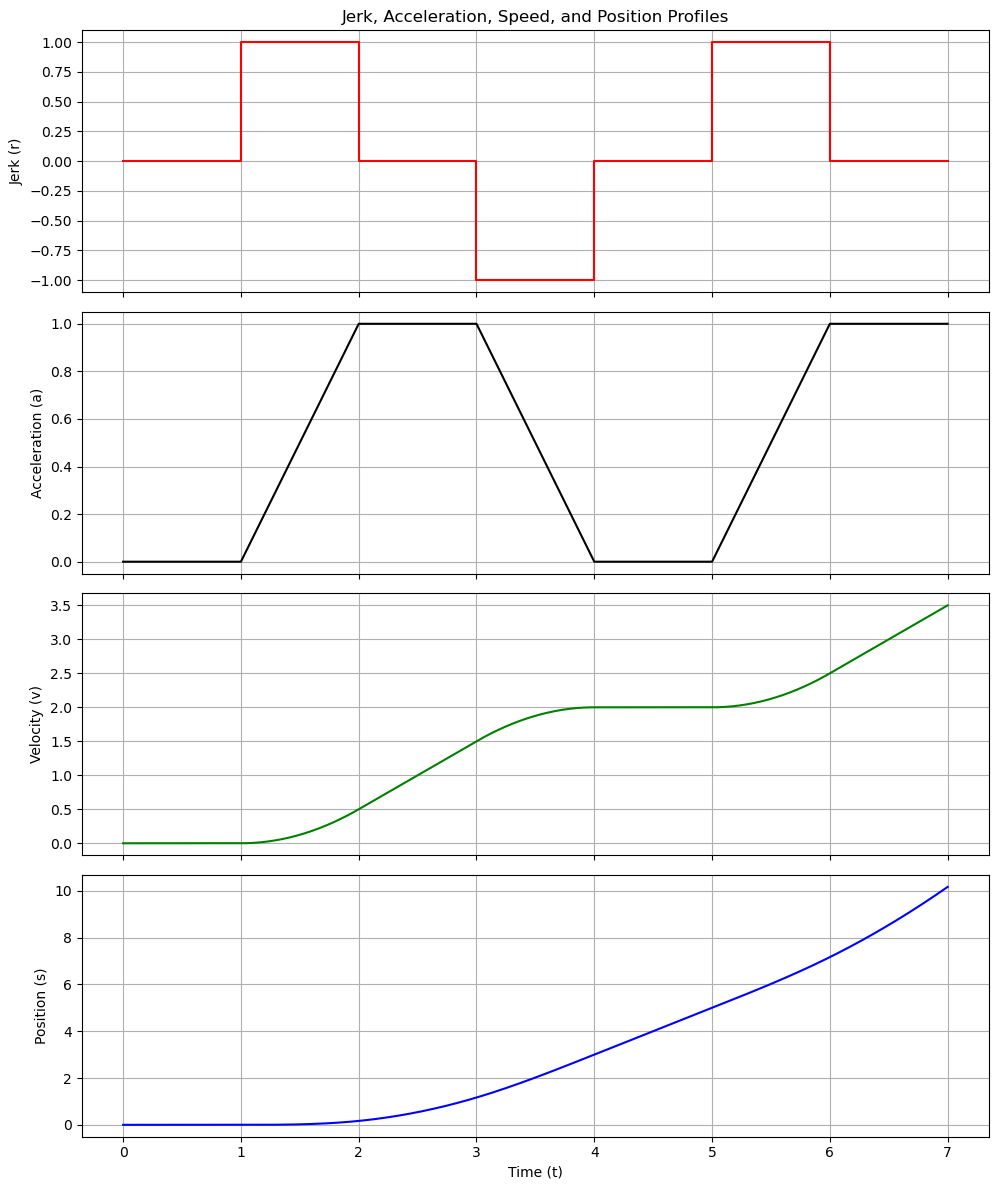

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time intervals for each phase
t1 = np.linspace(0, 1, 100)
t2 = np.linspace(1, 2, 100)
t3 = np.linspace(2, 3, 100)
t4 = np.linspace(3, 4, 100)
t5 = np.linspace(4, 5, 100)
t6 = np.linspace(5, 6, 100)
t7 = np.linspace(6, 7, 100)

# Define the jerk values for each phase
r1 = np.zeros_like(t1)
r2 = np.ones_like(t2)
r3 = np.zeros_like(t3)
r4 = -np.ones_like(t4)
r5 = np.zeros_like(t5)
r6 = np.ones_like(t6)
r7 = np.zeros_like(t7)

# Combine all time and jerk values
t = np.concatenate([t1, t2, t3, t4, t5, t6, t7])
r = np.concatenate([r1, r2, r3, r4, r5, r6, r7])

# Integrate jerk to get acceleration, velocity, and displacement
a = np.cumsum(r) * (t[1] - t[0])
v = np.cumsum(a) * (t[1] - t[0])
s = np.cumsum(v) * (t[1] - t[0])


# define the jerk phases with the correct time intervals
r_phases = [
    (t1, np.zeros_like(t1)),
    (t2, np.ones_like(t2)),
    (t3, np.zeros_like(t3)),
    (t4, -np.ones_like(t4)),
    (t5, np.zeros_like(t5)),
    (t6, np.ones_like(t6)),
    (t7, np.zeros_like(t7)),
]

# Initialize arrays for acceleration, velocity, and displacement
a = np.zeros_like(t)
v = np.zeros_like(t)
s = np.zeros_like(t)

# Initialize variables for the current values of acceleration, velocity, and displacement
current_a = 0
current_v = 0
current_s = 0

# Calculate acceleration, velocity, and displacement based on jerk
for i in range(1, len(t)):
    dt = t[i] - t[i-1]
    a[i] = a[i-1] + r[i-1] * dt
    v[i] = v[i-1] + a[i-1] * dt + 0.5 * r[i-1] * dt**2
    s[i] = s[i-1] + v[i-1] * dt + 0.5 * a[i-1] * dt**2 + (1/6) * r[i-1] * dt**3


# Plot the profiles
fig, ax = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

# Plot jerk
ax[0].plot(t, r, 'r')
ax[0].set_ylabel('Jerk (r)')
ax[0].set_title('Jerk, Acceleration, Speed, and Position Profiles')
ax[0].grid(True)

# Plot acceleration
ax[1].plot(t, a, 'k')
ax[1].set_ylabel('Acceleration (a)')
ax[1].grid(True)

# Plot velocity
ax[2].plot(t, v, 'g')
ax[2].set_ylabel('Velocity (v)')
ax[2].grid(True)

# Plot displacement
ax[3].plot(t, s, 'b')
ax[3].set_ylabel('Position (s)')
ax[3].set_xlabel('Time (t)')
ax[3].grid(True)

plt.tight_layout()
plt.show()

## Interpolation